<a href="https://colab.research.google.com/github/stvnfrnk/CoLab_franke/blob/main/rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install fiona

In [4]:
import numpy as np
import fiona
import rasterio
import rasterio.mask

from matplotlib import pyplot as plt
from matplotlib import collections as cplt
import rasterio.plot
from descartes import PolygonPatch

from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


Volume = 0.001079126171875 km^3
Volume = -0.0002297791015625 km^3
Volume = -0.0003632718017578125 km^3
Volume = 0.000292226611328125 km^3
Volume = 0.0023980583984375 km^3
Volume = -0.001995685546875 km^3
Volume = 0.0009998748046875 km^3
Volume = -0.0015031064453125 km^3


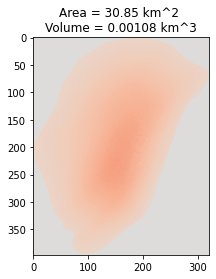

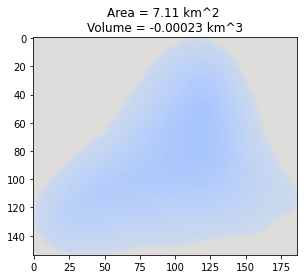

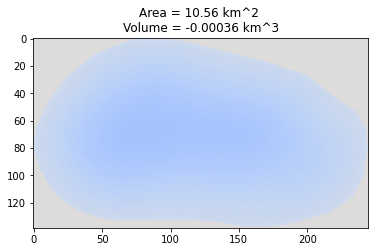

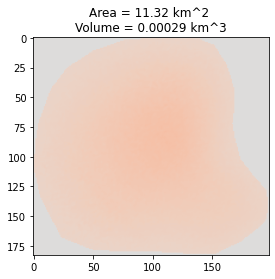

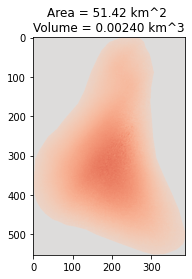

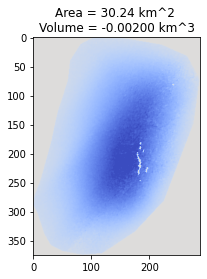

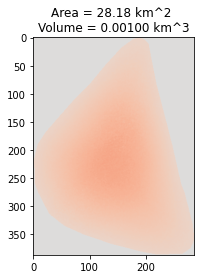

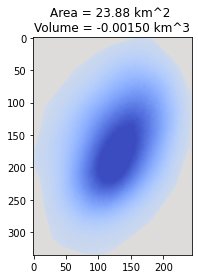

In [9]:
dates = ['2017_11', '2017_12', '2020_01']
#dates = ['2017_11']

for date in dates:

  path     = '/content/drive/MyDrive/'
  data     = path + date + '_unwrapped.tif'
  mask     = path + 'interferrometry_features_'+ date + '.shp'

  with fiona.open(mask, "r") as shapefile:
      features = [feature["geometry"] for feature in shapefile]


  src = rasterio.open(data)



  for i in np.arange(len(features)):
    msk = [features[i]]

    out_image, out_transform = rasterio.mask.mask(src, msk, crop=True)
    out_meta = src.meta

    #fig, ax = plt.subplots()
    #rasterio.plot.show((src, 1), ax=ax, cmap='coolwarm')
    #patches = [PolygonPatch(feature, edgecolor="red", facecolor="none", linewidth=2) for feature in msk]
    #ax.add_collection(cplt.PatchCollection(patches, match_original=True))
    #ax.set_xlim(min_y, max_y)
    #ax.set_ylim(min_x, max_x)
    #plt.show()
    print('Volume = {} km^3'.format(out_image.sum() * 20 * 20 / 1000000000))
    fig, ax = plt.subplots()
    rasterio.plot.show(out_image, ax=ax, cmap='coolwarm', vmin=-0.15, vmax=0.15)
    patches = [PolygonPatch(feature, edgecolor="red", facecolor="none", linewidth=2) for feature in msk]
    ax.add_collection(cplt.PatchCollection(patches, match_original=True))
    plt.title('Area = {:.2f} km^2 \nVolume = {:.5f} km^3'.format(np.count_nonzero(out_image) * 20 * 20 / 1000000, out_image.sum() * 20 * 20 / 1000000000))
    plt.savefig(path + str(i) + '.png', dpi=300, bbox_inches='tight')
    plt.show
    

In [112]:
np.count_nonzero(out_image) * 20 * 20 / 1000000

23.8788

In [7]:
plt.savefig(i + '.png', dpi=300, bbox_inches='tight')

UFuncTypeError: ignored